In [52]:
import torch
from torch import nn
import matplotlib.pyplot as plt

class Generator(nn.Module):
    '''
    Generator class. Accepts a tensor of size 100 as input as outputs another
    tensor of size 784. Objective is to generate an output tensor that is
    indistinguishable from the real MNIST digits 
    '''

    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Linear(in_features=128, out_features=256),
                                    nn.LeakyReLU())
        self.layer2 = nn.Sequential(nn.Linear(in_features=256, out_features=512),
                                    nn.LeakyReLU())
        self.layer3 = nn.Sequential(nn.Linear(in_features=512, out_features=1024),
                                    nn.LeakyReLU())
        self.output = nn.Linear(in_features=1024, out_features=28 * 28)

        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.output(x)
        x = x.view(-1, 1, 28, 28)
        x = self.tanh(x)
        return x


model = torch.load('./epochs/Generator_epoch_109.pth', map_location='cpu')

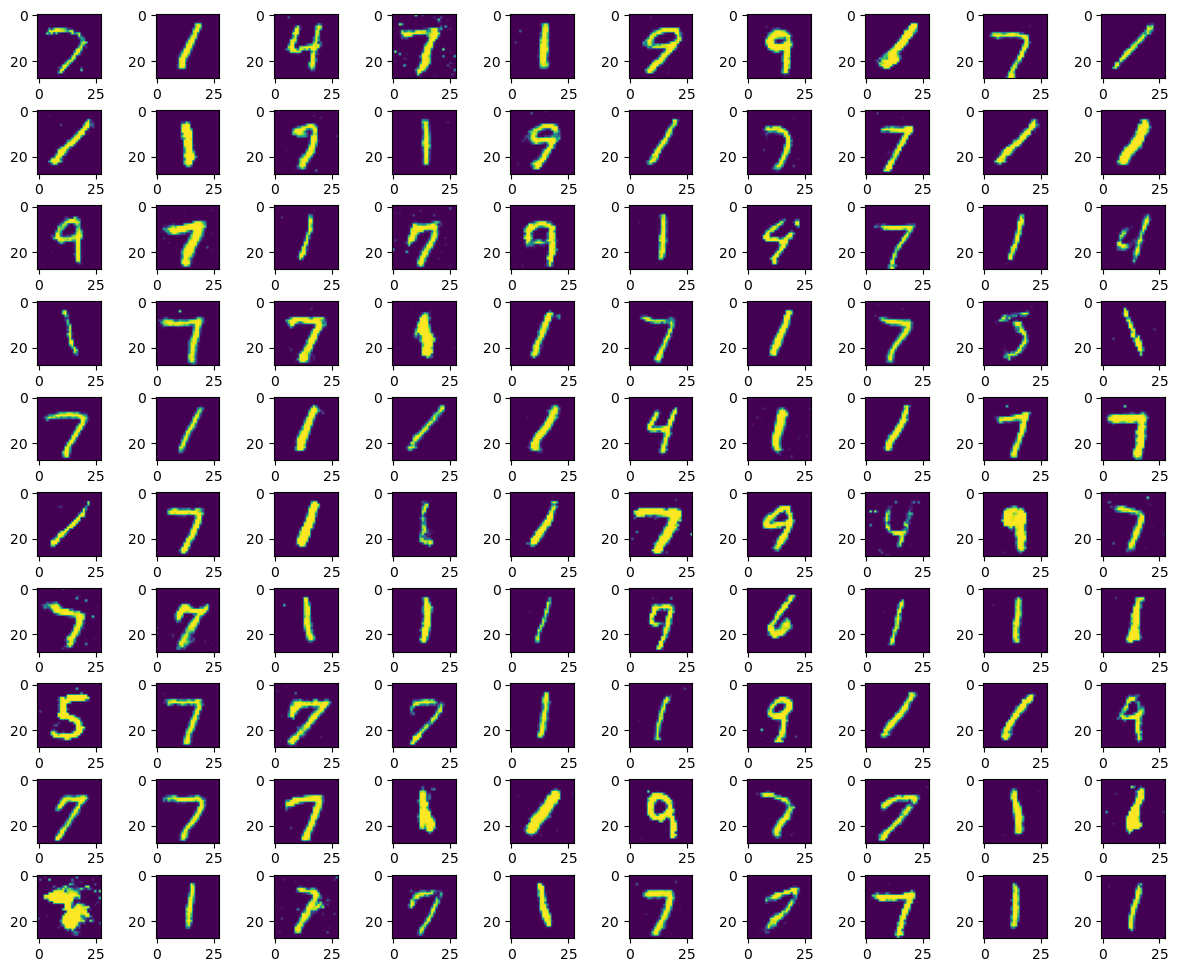

In [59]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
for n in range(100):
    ax = plt.subplot(10, 10, n + 1)

    # filter df and plot ticker on the new subplot axis
    ax.imshow(model(torch.randn(128)).detach().numpy().squeeze())

    ax.set_xlabel("")
    

In [15]:
model(torch.randn(128)).squeeze().size()

torch.Size([28, 28])

In [44]:
ax

<Axes: >